<a href="https://colab.research.google.com/github/nakul-c/PM10_prediction_SciML/blob/main/SciML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,21-08-2019 00:00,11.24,43.98,NaN,NaN,0.00,9.30,6.10,0.25,15.18,...,1.96,30.25,79.99,0.47,243.74,0.00,0.0,47.24,997.75,-0.01
1,22-08-2019 00:00,21.28,45.70,4.19,83.86,1.65,5.42,8.01,0.18,36.86,...,0.82,29.28,85.10,0.33,181.71,0.08,7.2,147.78,997.21,-0.01
2,23-08-2019 00:00,7.80,19.51,4.46,NaN,4.46,NaN,2.12,0.20,43.98,...,1.21,28.81,86.44,0.35,154.85,0.01,1.4,168.01,997.27,-0.01
3,24-08-2019 00:00,7.48,19.47,13.18,277.32,7.74,232.41,2.93,0.18,40.97,...,0.81,27.42,94.65,0.35,121.75,0.01,1.2,177.57,997.04,-0.01
4,25-08-2019 00:00,7.10,16.46,32.36,33.16,46.91,38.57,1.47,0.18,62.44,...,0.56,27.42,93.10,0.80,117.91,0.00,0.0,230.91,999.25,-0.01


In [ ]:
# Convert columns to numeric, forcing errors to NaN
cols_to_convert = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
    'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
    'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
    'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
    'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')

# Set timestamp as index
data.set_index('Timestamp', inplace=True)
# Handle missing values by filling with the mean of each column
data.fillna(data.mean(), inplace=True)

# Convert timestamp to datetime


# Display summary statistics
data.describe()


,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,...,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,48.747264,97.431158,11.256005,20.575829,29.986151,21.560861,12.227212,0.644048,34.434381,4.457016,...,7.792449,23.354362,93.440201,12.645242,251.224979,0.152654,1.574294,115.876210,992.432496,1.521127
std,36.754418,65.850626,10.076688,15.162272,21.738976,13.566662,6.875032,0.389891,16.435267,4.166135,...,19.589984,7.672772,33.803446,42.655223,226.406468,0.277495,9.999279,52.815122,31.941487,2.924506
min,2.620000,8.290000,1.760000,2.170000,0.000000,1.760000,1.470000,0.070000,3.880000,0.000000,...,0.020000,0.090000,30.271458,0.067500,39.970000,0.000000,0.000000,9.200000,722.190000,-19.200000
25%,17.970000,41.182083,5.950000,10.399891,15.533696,12.010000,7.699757,0.340000,22.680000,2.375313,...,0.660000,23.354362,77.830000,0.430000,150.615486,0.000000,0.000000,71.250000,992.432496,0.000000
50%,38.811840,79.139653,7.860000,17.970000,24.857639,18.960000,10.530000,0.562118,32.970000,3.887049,...,1.450000,23.354362,90.090000,1.070000,196.310000,0.041667,0.000000,113.000000,994.680000,1.000000
75%,74.010000,147.570382,12.070000,26.948854,35.930000,28.110000,15.245799,0.841771,43.550000,5.010000,...,3.930000,28.240000,98.980000,2.100000,242.000000,0.152654,0.008333,146.260000,999.639583,1.521127
max,211.130000,359.130000,82.680000,277.320000,212.040000,245.150000,74.350000,3.810000,151.231574,65.468438,...,99.570000,37.056111,255.920000,338.610000,1015.960000,1.870000,174.200000,403.960000,1016.130556,18.010000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant features
features = [
    'PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
target = 'PM10 (µg/m³)'

# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[features + [target]]), columns=features + [target])
data_normalized.to_csv('/content/drive/MyDrive/SciML/csvfiles/normalized_BIDHANAAGAR_complete_raw_data.csv')

# Display the first few rows of the normalized data
data_normalized.head()


,PM2.5 (µg/m³),NO (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),PM10 (µg/m³)
0,0.041341,0.117351,0.066894,0.063529,0.048128,0.076687,0.815882,0.220336,0.001189,0.208783,0.096362,0.937468,0.515722,0.101727
1,0.089492,0.030030,0.296893,0.089737,0.029412,0.223818,0.789642,0.242982,0.000775,0.145227,0.351049,0.935631,0.515722,0.106630
2,0.024843,0.033366,0.066894,0.008919,0.034759,0.272138,0.776928,0.248920,0.000834,0.117706,0.402295,0.935835,0.515722,0.031980
3,0.023308,0.141127,1.000000,0.020033,0.029412,0.251711,0.739326,0.285304,0.000834,0.083792,0.426512,0.935053,0.515722,0.031866
4,0.021486,0.378151,0.112629,0.000000,0.029412,0.397417,0.739326,0.278435,0.002164,0.079857,0.561632,0.942572,0.515722,0.023287


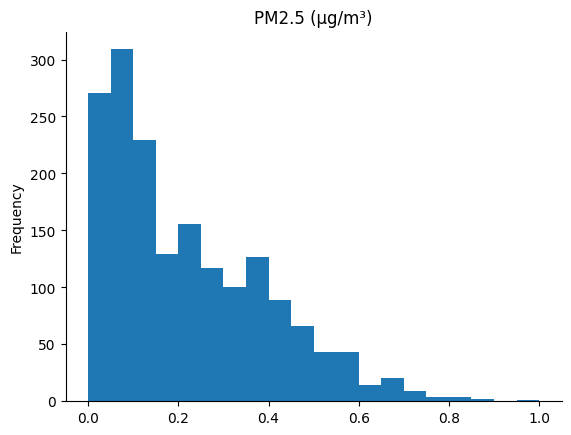

In [ ]:
# @title PM2.5 (µg/m³)

from matplotlib import pyplot as plt
data_normalized['PM2.5 (µg/m³)'].plot(kind='hist', bins=20, title='PM2.5 (µg/m³)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data_normalized[features]
y = data_normalized[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1386, 13), (347, 13), (1386,), (347,))

In [ ]:
# prompt: Write a PINN to predict PM 10 value from the above dataset

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, X_test, y_train, y_test are already defined

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Define the PINN model
class PINN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = PINN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [10/100], Loss: 0.0009
Epoch [20/100], Loss: 0.0051
Epoch [30/100], Loss: 0.0017
Epoch [40/100], Loss: 0.0020
Epoch [50/100], Loss: 0.0006
Epoch [60/100], Loss: 0.0031
Epoch [70/100], Loss: 0.0058
Epoch [80/100], Loss: 0.0028
Epoch [90/100], Loss: 0.0015
Epoch [100/100], Loss: 0.0025
Test Loss: 0.0016


Test Loss: 0.0016
Mean Absolute Error (MAE): 10.11
Root Mean Squared Error (RMSE): 14.22
R-squared (R2): 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


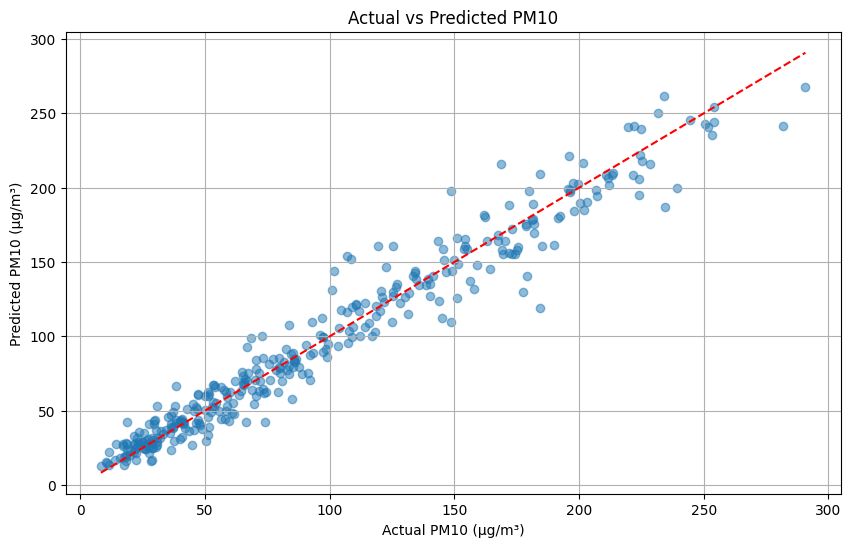

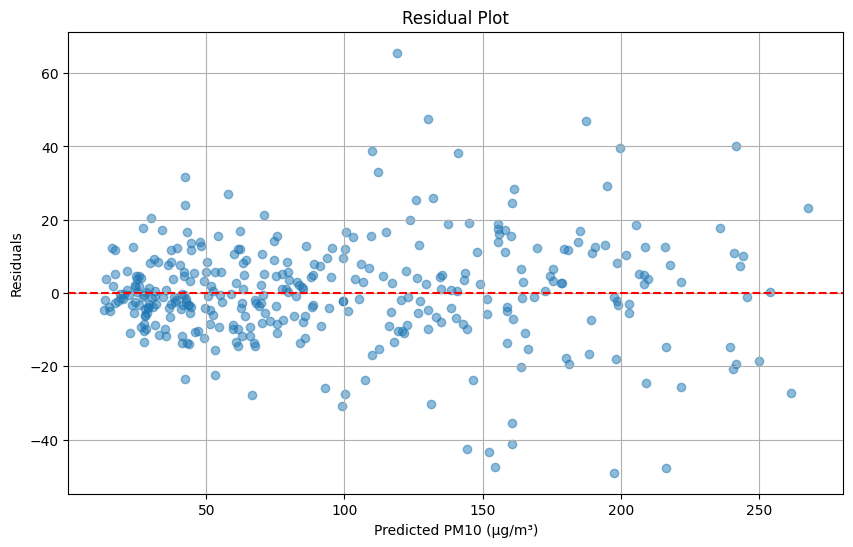

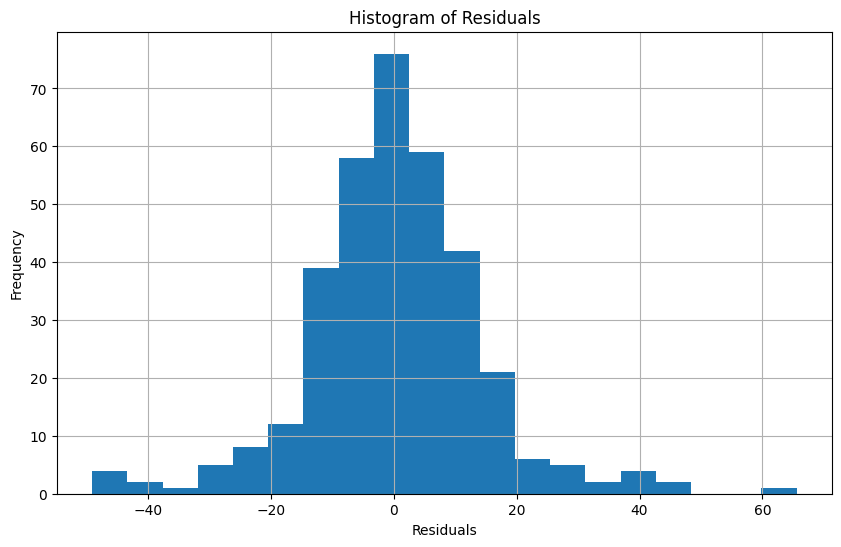

In [ ]:


# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Inverse transform the predictions and actual values to original scale
y_pred_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_pred], dim=1).numpy())[:, -1]
y_test_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_test_tensor], dim=1).numpy())[:, -1]

# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
r2 = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualize predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel('Actual PM10 (µg/m³)')
plt.ylabel('Predicted PM10 (µg/m³)')
plt.title('Actual vs Predicted PM10')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test_original - y_pred_original
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.xlabel('Predicted PM10 (µg/m³)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


Epoch [10/100], Loss: 0.0005
Epoch [20/100], Loss: 0.0032
Epoch [30/100], Loss: 0.0008
Epoch [40/100], Loss: 0.0010
Epoch [50/100], Loss: 0.0014
Epoch [60/100], Loss: 0.0024
Epoch [70/100], Loss: 0.0022
Epoch [80/100], Loss: 0.0068
Epoch [90/100], Loss: 0.0009
Epoch [100/100], Loss: 0.0006
Test Loss: 0.0018
Mean Absolute Error (MAE): 6.16
Root Mean Squared Error (RMSE): 8.94
R-squared (R2): 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


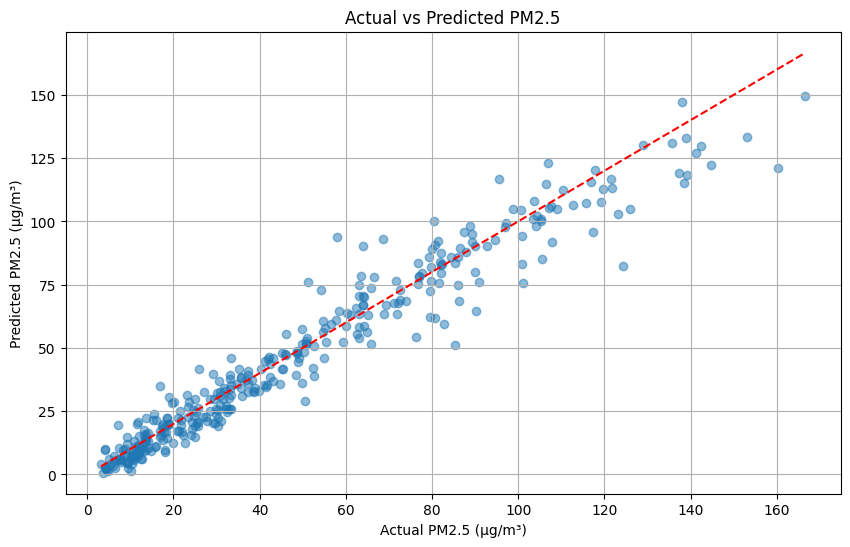

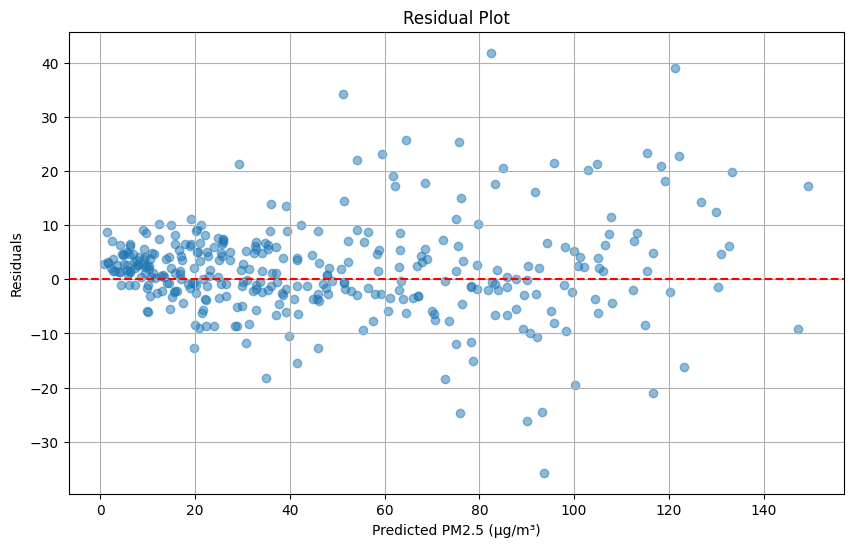

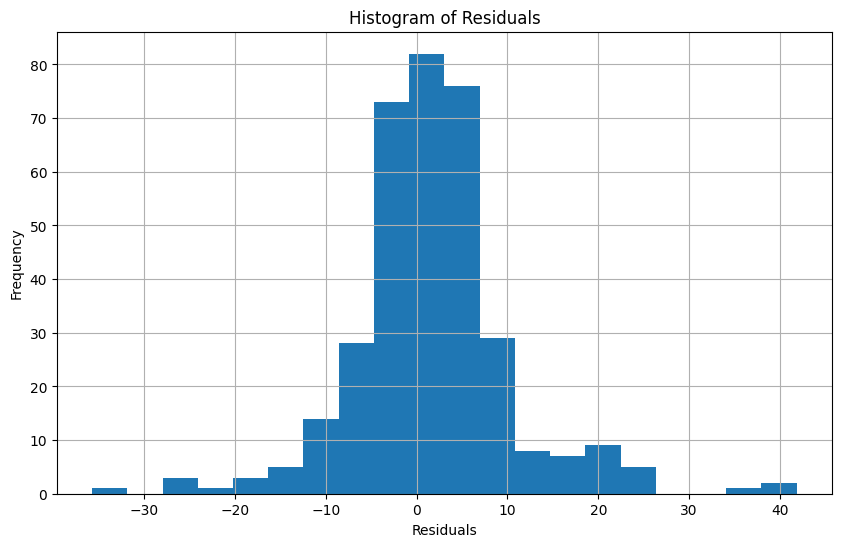

In [ ]:
# prompt: Write PINN to predict PM 2.5 values. Print the accuracy, loss values. Plot all necessary graphs for accuracy and prediction

# Select relevant features
features = [
    'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
target = 'PM2.5 (µg/m³)'

# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[features + [target]]), columns=features + [target])

# Split the data into training and testing sets
X = data_normalized[features]
y = data_normalized[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Instantiate the model
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
model = PINN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Inverse transform the predictions and actual values to original scale
y_pred_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_pred], dim=1).numpy())[:, -1]
y_test_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_test_tensor], dim=1).numpy())[:, -1]

# Calculate accuracy metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
r2 = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel('Actual PM2.5 (µg/m³)')
plt.ylabel('Predicted PM2.5 (µg/m³)')
plt.title('Actual vs Predicted PM2.5')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test_original - y_pred_original
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.xlabel('Predicted PM2.5 (µg/m³)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()


Test Loss: 0.0018
Mean Absolute Error (MAE): 6.16
Root Mean Squared Error (RMSE): 8.94
R-squared (R2): 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


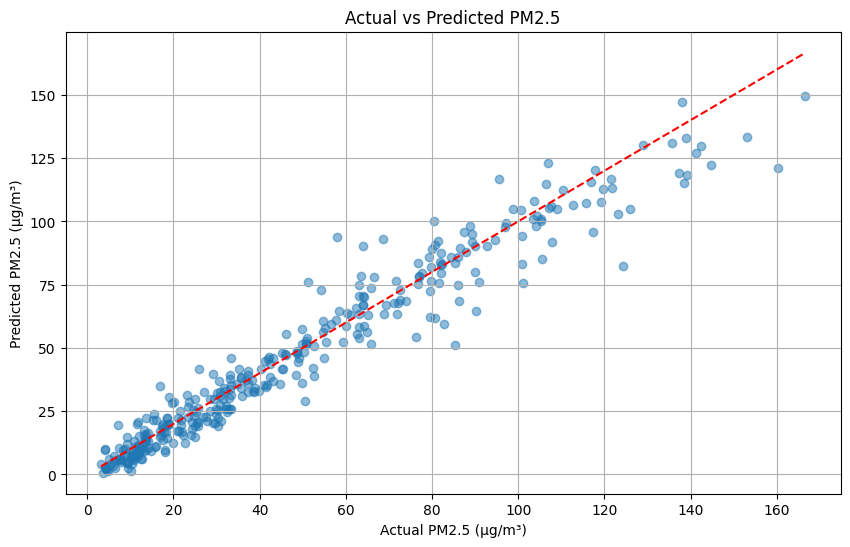

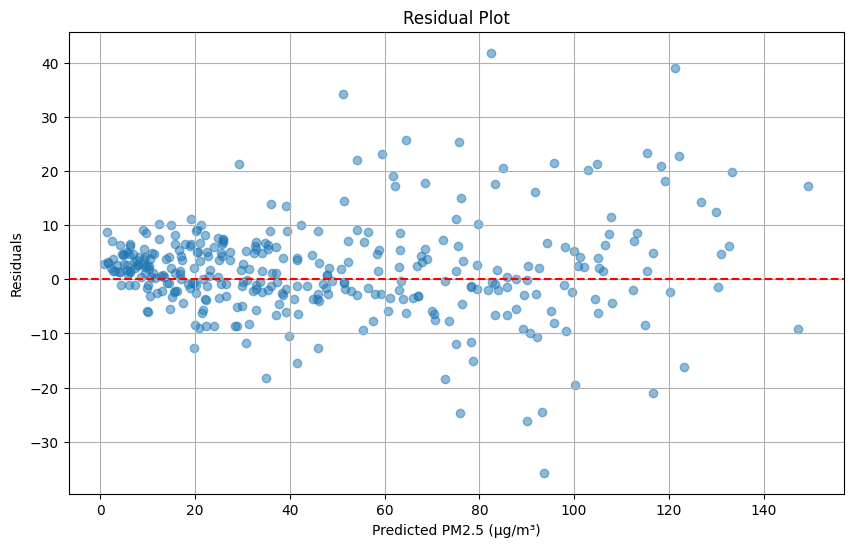

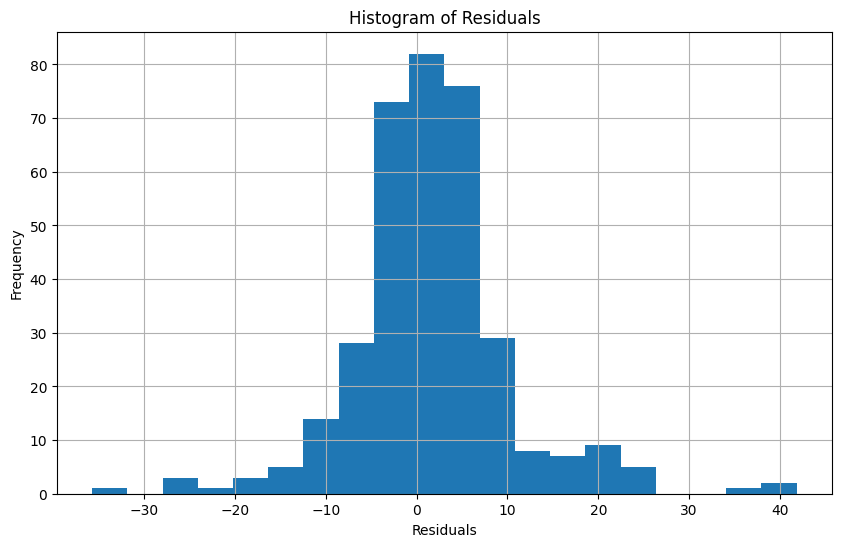

In [ ]:
# prompt: Code to help me understand how good the model is working. Also help in visualising the PINN model

# ... (preceding code) ...

# Evaluate the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Inverse transform the predictions and actual values to original scale
y_pred_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_pred], dim=1).numpy())[:, -1]
y_test_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_test_tensor], dim=1).numpy())[:, -1]

# Calculate accuracy metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
r2 = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.xlabel('Actual PM2.5 (µg/m³)')
plt.ylabel('Predicted PM2.5 (µg/m³)')
plt.title('Actual vs Predicted PM2.5')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test_original - y_pred_original
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.xlabel('Predicted PM2.5 (µg/m³)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Best PM10 RMSE: 14.248081
Best PM10 Parameters: {'hidden_size': 32, 'lr': 0.001, 'batch_size': 16}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Best PM2.5 RMSE: 8.30029
Best PM2.5 Parameters: {'hidden_size': 64, 'lr': 0.01, 'batch_size': 32}
Retraining best PM10 model:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 6.19
Root Mean Squared Error (RMSE): 9.24
R-squared (R2): 0.94


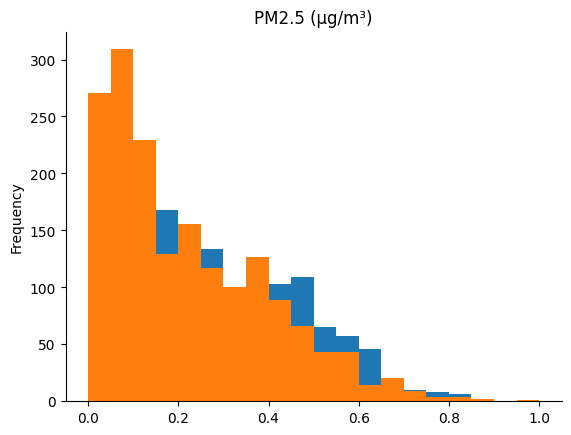

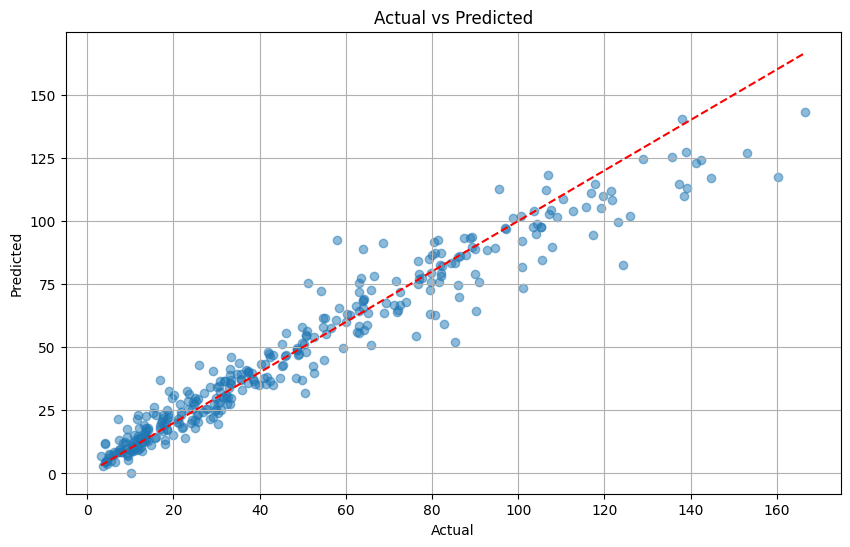

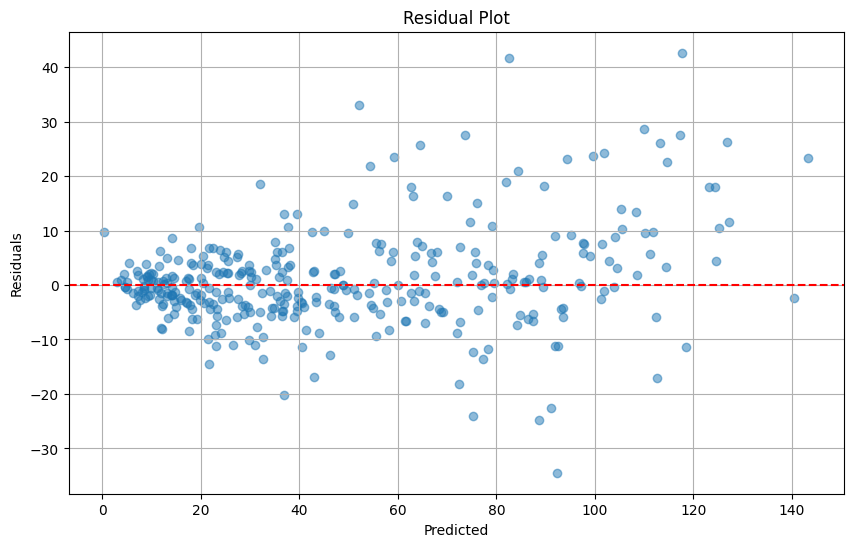

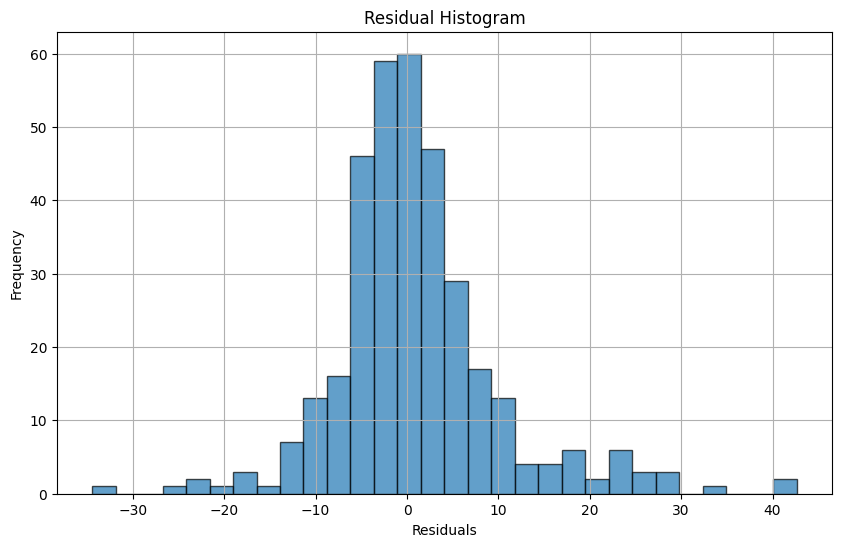

Retraining best PM2.5 model:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 5.98
Root Mean Squared Error (RMSE): 8.48
R-squared (R2): 0.95


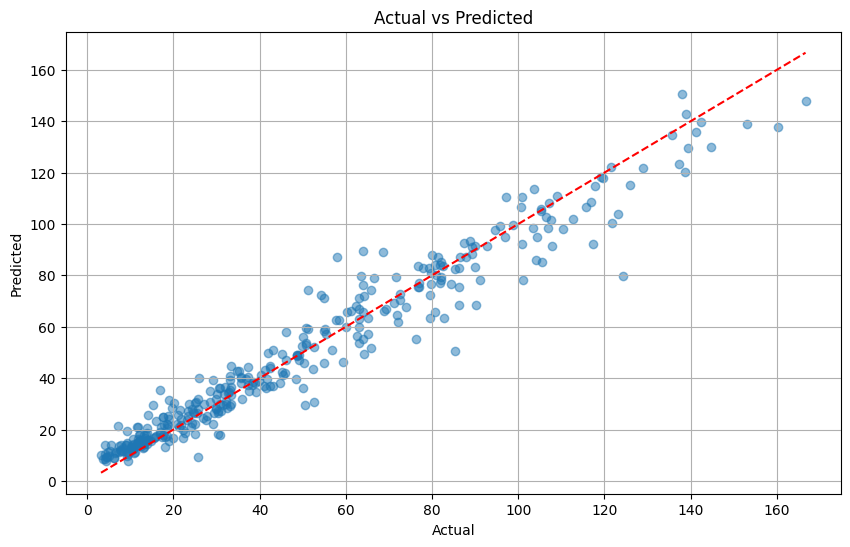

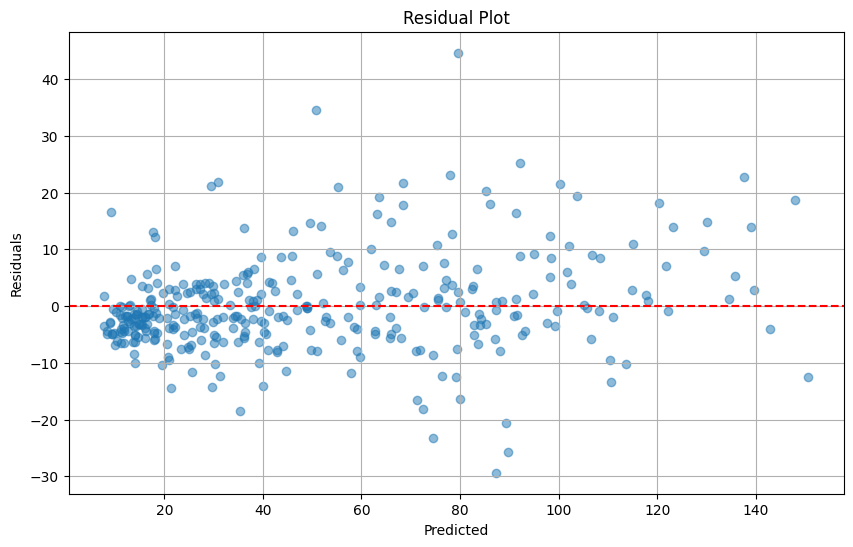

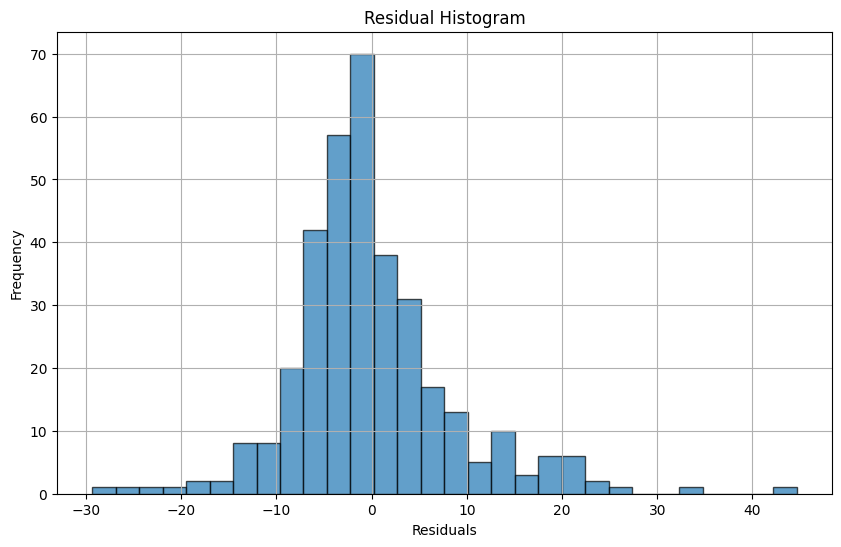

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import itertools

# Define the PINN model
class PINN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Hyperparameter ranges
hidden_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

# Function to train and evaluate the model
def train_evaluate_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_size, lr, batch_size, num_epochs=100):
    input_size = X_train_tensor.shape[1]
    output_size = 1

    # Instantiate the model
    model = PINN(input_size, hidden_size, output_size)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Create DataLoader for training data
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train the model
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        test_loss = criterion(y_pred, y_test_tensor)

    return model, test_loss.item(), y_pred

# Function to perform hyperparameter tuning
def hyperparameter_tuning(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_sizes, learning_rates, batch_sizes):
    best_rmse = float('inf')
    best_params = {}
    best_model = None

    for hidden_size, lr, batch_size in itertools.product(hidden_sizes, learning_rates, batch_sizes):
        model, test_loss, y_pred = train_evaluate_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_size, lr, batch_size)

        # Inverse transform the predictions and actual values to original scale
        y_pred_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_pred], dim=1).numpy())[:, -1]
        y_test_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_test_tensor], dim=1).numpy())[:, -1]

        # Calculate RMSE
        rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}
            best_model = model

    return best_model, best_rmse, best_params

# Perform hyperparameter tuning for PM10 prediction
features = [
    'PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
target = 'PM10 (µg/m³)'

# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[features + [target]]), columns=features + [target])

# Split the data into training and testing sets
X = data_normalized[features]
y = data_normalized[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)


from matplotlib import pyplot as plt
data_normalized['PM10 (µg/m³)'].plot(kind='hist', bins=20, title='PM10 (µg/m³)')
plt.gca().spines[['top', 'right',]].set_visible(False)

best_pm10_model, best_pm10_rmse, best_pm10_params = hyperparameter_tuning(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_sizes, learning_rates, batch_sizes)
print("Best PM10 RMSE:", best_pm10_rmse)
print("Best PM10 Parameters:", best_pm10_params)

# Perform hyperparameter tuning for PM2.5 prediction
features = [
    'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
target = 'PM2.5 (µg/m³)'

# Normalize the data
data_normalized = pd.DataFrame(scaler.fit_transform(data[features + [target]]), columns=features + [target])

# Split the data into training and testing sets
X = data_normalized[features]
y = data_normalized[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)


from matplotlib import pyplot as plt
data_normalized['PM2.5 (µg/m³)'].plot(kind='hist', bins=20, title='PM2.5 (µg/m³)')
plt.gca().spines[['top', 'right',]].set_visible(False)

best_pm25_model, best_pm25_rmse, best_pm25_params = hyperparameter_tuning(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_sizes, learning_rates, batch_sizes)
print("Best PM2.5 RMSE:", best_pm25_rmse)
print("Best PM2.5 Parameters:", best_pm25_params)

# --- Retrain Models with Best Hyperparameters ---
def retrain_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_size, lr, batch_size, num_epochs=100):
    model, test_loss, y_pred = train_evaluate_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, hidden_size, lr, batch_size, num_epochs)

    # Inverse transform the predictions and actual values to original scale
    y_pred_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_pred], dim=1).numpy())[:, -1]
    y_test_original = scaler.inverse_transform(torch.cat([X_test_tensor, y_test_tensor], dim=1).numpy())[:, -1]

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
    r2 = r2_score(y_test_original, y_pred_original)

    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_original, y_pred_original, alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')  # Diagonal line for reference
    plt.grid(True)
    plt.show()

    # Plot residuals
    residuals = y_test_original - y_pred_original
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_original, residuals, alpha=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram')
    plt.grid(True)
    plt.show()

    return model,y_pred_original,y_test_original

# Retrain and evaluate the best PM10 model
print("Retraining best PM10 model:")
best_pm10_model,y_pred_pm10, y_test_pm10 = retrain_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, best_pm10_params['hidden_size'], best_pm10_params['lr'], best_pm10_params['batch_size'])

# Retrain and evaluate the best PM2.5 model
print("Retraining best PM2.5 model:")
best_pm25_model, y_pred_pm25, y_test_pm25 = retrain_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, best_pm25_params['hidden_size'], best_pm25_params['lr'], best_pm25_params['batch_size'])

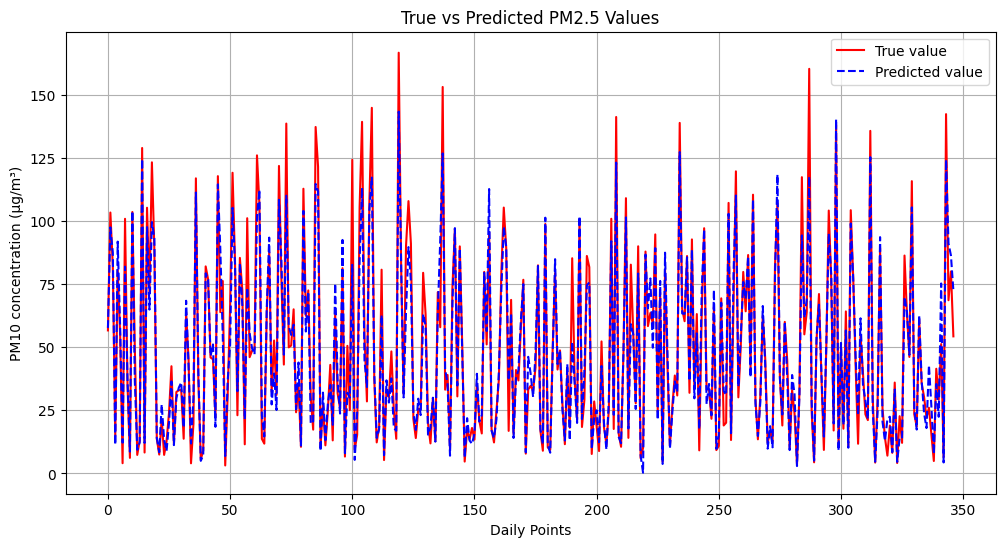

In [ ]:
import matplotlib.pyplot as plt

# Generate a time-series plot of true vs predicted values for PM2.5
def plot_true_vs_predicted(y_test_original, y_pred_original, time_points):
    plt.figure(figsize=(12, 6))

    # Plot true values
    plt.plot(time_points, y_test_original, 'r-', label='True value')

    # Plot predicted values
    plt.plot(time_points, y_pred_original, 'b--', label='Predicted value')

    # Add labels, legend, and title
    plt.xlabel('Daily Points')
    plt.ylabel('PM10 concentration (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.title('True vs Predicted PM2.5 Values')

    # Show the plot
    plt.show()

time_points = list(range(len(y_test_pm10)))  # Replace with actual time points if available
plot_true_vs_predicted(y_test_pm10, y_pred_pm10, time_points)

# SciML-4 (Best Performing)

In [1]:
!git config --global user.name "nakul-c"
!git config --global user.email "nakul.choudhari07@gmail.com"

In [3]:
!git clone https://github.com/nakul-c/LULC_Prediction.git

Cloning into 'LULC_Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [5]:
!mv SciML LULC_Prediction/

mv: cannot stat 'SciML.py': No such file or directory


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Convert columns to numeric
cols_to_convert = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
    'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
    'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
    'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
    'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)

# Handle missing values using KNN imputer
imputer = KNNImputer(n_neighbors=5)
data[cols_to_convert] = imputer.fit_transform(data[cols_to_convert])

# Feature Engineering
data['AT_RH'] = data['AT (°C)'] * data['RH (%)']
data['WS_WD'] = data['WS (m/s)'] * np.sin(data['WD (deg)'] * (np.pi / 180))
data['WS_WD_cos'] = data['WS (m/s)'] * np.cos(data['WD (deg)'] * (np.pi / 180))

# Add time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

features = [
    'PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT_RH', 'WS_WD', 'WS_WD_cos',
    'hour', 'day_of_week', 'month'
]
target = 'PM10 (µg/m³)'

X = data[features].values
y = data[target].values.reshape(-1, 1)

# Separate meteorological features
meteorological_features_indices = [features.index(col) for col in ['AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']]
meteorological_features = X[:, meteorological_features_indices]
remaining_features_indices = [i for i in range(len(features)) if i not in meteorological_features_indices]
remaining_features = X[:, remaining_features_indices]

# Apply PolynomialFeatures to the remaining features
poly = PolynomialFeatures(degree=2, include_bias=False)
remaining_features_poly = poly.fit_transform(remaining_features)
remaining_features_columns = [features[i] for i in remaining_features_indices]

# Get the polynomial feature names using the original column names
poly_feature_names = poly.get_feature_names_out(remaining_features_columns)
X_poly = np.hstack((remaining_features_poly, meteorological_features))
combined_feature_names = list(poly_feature_names) + [features[i] for i in meteorological_features_indices]
X_poly = pd.DataFrame(X_poly, columns=combined_feature_names)
print(X_poly.head())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers on training data
X_train_normalized = feature_scaler.fit_transform(X_train)
y_train_normalized = target_scaler.fit_transform(y_train)

# Normalize validation and test data
X_val_normalized = feature_scaler.transform(X_val)
y_val_normalized = target_scaler.transform(y_val)
X_test_normalized = feature_scaler.transform(X_test)
y_test_normalized = target_scaler.transform(y_test)

# Convert normalized data to tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_normalized, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32).reshape(-1, 1)

print(X.shape, y.shape, X_poly.shape, X_train.shape, y_train.shape, X_train_normalized.shape, y_train_normalized.shape, X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape, X_test_tensor.shape, y_test_tensor.shape)

class PINN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 128, 128], output_size=1, dropout_rate=0.3):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        self.dropout_layers = nn.ModuleList()
        self.activation = nn.ReLU()

        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.dropout_layers.append(nn.Dropout(dropout_rate))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            self.dropout_layers.append(nn.Dropout(dropout_rate))

        # Output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Learnable alpha coefficients
        self.alpha = nn.Parameter(torch.ones(16))

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.activation(self.layers[i](x))
            x = self.dropout_layers[i](x)
        x = self.layers[-1](x)
        return x

# Define the physics-informed loss term with more complex relationships
def calculate_physics_terms(features, predictions, alpha):
    temp = features[:, -7]  # AT (°C)
    humidity = features[:, -6]  # RH (%)
    wind_speed = features[:, -5]  # WS (m/s)
    wind_direction = features[:, -4]  # WD (deg)
    solar_radiation = features[:, -3]  # SR (W/m²)
    pressure = features[:, -2]  # BP (mmHg)
    vertical_wind_speed = features[:, -1]  # VWS (m/s)

    # Calculate the physics-informed term with more complex relationships
    physics_term = (alpha[0] + alpha[1] * temp + alpha[2] * humidity + alpha[3] * wind_speed +
                    alpha[4] * torch.sin(wind_direction * (3.14159 / 180)) +
                    alpha[5] * torch.cos(wind_direction * (3.14159 / 180)) +
                    alpha[6] * solar_radiation + alpha[7] * pressure + alpha[8] * vertical_wind_speed +
                    alpha[9] * (temp * humidity) + alpha[10] * (wind_speed ** 2) +
                    alpha[11] * (solar_radiation * pressure) +
                    alpha[12] * (temp ** 2) + alpha[13] * (humidity ** 2) +
                    alpha[14] * (pressure ** 2) + alpha[15] * (vertical_wind_speed ** 2))

    physics_loss = torch.mean((predictions - physics_term) ** 2)
    return physics_loss

# Define the combined loss function with flexible weighting
def pinn_loss(pred, true, physics_loss, physics_weight):
    mse_loss = nn.MSELoss()(pred, true)
    total_loss = mse_loss + physics_weight * physics_loss
    return total_loss, mse_loss, physics_loss

def objective(trial):
    # Define hyperparameters to tune
    wind_weight = trial.suggest_float('wind_weight', 0.01, 1.0)
    vertical_wind_weight = trial.suggest_float('vertical_wind_weight', 0.01, 1.0)
    temp_weight = trial.suggest_float('temp_weight', 0.01, 1.0)
    humidity_weight = trial.suggest_float('humidity_weight', 0.01, 1.0)
    solar_weight = trial.suggest_float('solar_weight', 0.01, 1.0)
    pressure_weight = trial.suggest_float('pressure_weight', 0.01, 1.0)
    wind_direction_weight = trial.suggest_float('wind_direction_weight', 0.001, 0.1)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2)
    hidden_sizes = trial.suggest_categorical('hidden_sizes', [[64, 64], [128, 128], [256, 256], [128, 128, 128]])
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    physics_weight = trial.suggest_float('physics_weight', 0.1, 5.0)

    model = PINN(input_size=X_train_tensor.shape[1], hidden_sizes=hidden_sizes, dropout_rate=dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

    # Training loop
    num_epochs = 50
    best_val_loss = float('inf')
    patience = 20
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train_tensor)
        physics_loss = calculate_physics_terms(X_train_tensor, predictions, model.alpha)
        total_loss, mse_loss, physics_loss = pinn_loss(predictions, y_train_tensor, physics_loss, physics_weight)
        if torch.isnan(total_loss):
            return float('inf')
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val_tensor)
            val_physics_loss = calculate_physics_terms(X_val_tensor, val_predictions, model.alpha)
            val_total_loss, val_mse_loss, val_physics_loss = pinn_loss(val_predictions, y_val_tensor, val_physics_loss, physics_weight)
        scheduler.step(val_total_loss)
        if val_total_loss < best_val_loss:
            best_val_loss = val_total_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break
    return best_val_loss.item()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(best_params)

best_model = PINN(input_size=X_train_tensor.shape[1], hidden_sizes=best_params['hidden_sizes'], dropout_rate=best_params['dropout_rate'])
best_optimizer = optim.Adam(best_model.parameters(), lr=best_params['learning_rate'], weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(best_optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# Training loop with early stopping
num_epochs = 100
best_val_loss = float('inf')
patience = 20
counter = 0
for epoch in range(num_epochs):
    best_model.train()
    best_optimizer.zero_grad()
    predictions = best_model(X_train_tensor)
    physics_loss = calculate_physics_terms(X_train_tensor, predictions, best_model.alpha)
    total_loss, mse_loss, physics_loss = pinn_loss(predictions, y_train_tensor, physics_loss, best_params['physics_weight'])
    if torch.isnan(total_loss):
        print(f'Epoch {epoch+1}: NaN detected in loss, skipping update')
        continue
    total_loss.backward()
    torch.nn.utils.clip_grad_norm_(best_model.parameters(), max_norm=1.0)
    best_optimizer.step()
    # Validation
    best_model.eval()
    with torch.no_grad():
        val_predictions = best_model(X_val_tensor)
        val_physics_loss = calculate_physics_terms(X_val_tensor, val_predictions, best_model.alpha)
        val_total_loss, val_mse_loss, val_physics_loss = pinn_loss(val_predictions, y_val_tensor, val_physics_loss, best_params['physics_weight'])
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss.item()}, Val Loss: {val_total_loss.item()}')
    scheduler.step(val_total_loss)
    if val_total_loss < best_val_loss:
        best_val_loss = val_total_loss
        counter = 0
        best_model_state = best_model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

# Load the best model
best_model.load_state_dict(best_model_state)

# Evaluate the final model on the test set
best_model.eval()
with torch.no_grad():
    test_predictions = best_model(X_test_tensor).numpy()

mse = mean_squared_error(y_test_tensor, test_predictions)
mae = mean_absolute_error(y_test_tensor, test_predictions)
r2 = r2_score(y_test_tensor, test_predictions)
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'Test R2: {r2}')


[I 2025-02-09 12:41:39,600] A new study created in memory with name: no-name-197463e6-2406-4c1e-8420-a37c14050c36


   PM2.5 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  \
0          11.24       3.884        5.056         6.10        0.25   
1          21.28       4.190       83.860         8.01        0.18   
2           7.80       4.460       60.422         2.12        0.20   
3           7.48      13.180      277.320         2.93        0.18   
4           7.10      32.360       33.160         1.47        0.18   

   Ozone (µg/m³)      AT_RH     WS_WD  WS_WD_cos  hour  ...  day_of_week^2  \
0          15.18  2419.6975 -0.421494  -0.207949   0.0  ...            4.0   
1          36.86  2491.7280 -0.009847  -0.329853   0.0  ...            9.0   
2          43.98  2490.3364  0.148746  -0.316819   0.0  ...           16.0   
3          40.97  2595.3030  0.297623  -0.184175   0.0  ...           25.0   
4          62.44  2552.8020  0.706947  -0.374467   0.0  ...           36.0   

   day_of_week month  month^2  AT (°C)  RH (%)  WS (m/s)  WD (deg)  \
0               16.0     64.0    30.25  

/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [64, 64] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [128, 128] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage bu

{'wind_weight': 0.145467730988165, 'vertical_wind_weight': 0.8374219913076384, 'temp_weight': 0.1539395545040177, 'humidity_weight': 0.9488088765256854, 'solar_weight': 0.07411397550087671, 'pressure_weight': 0.8555078541806674, 'wind_direction_weight': 0.02126905282705489, 'learning_rate': 0.009937670040952534, 'hidden_sizes': [128, 128, 128], 'dropout_rate': 0.21687689646616806, 'physics_weight': 0.10133492615159456}
Epoch 1/100, Loss: 4.80029296875, Val Loss: 3.9862499237060547
Epoch 2/100, Loss: 4.033431529998779, Val Loss: 5.211393356323242
Epoch 3/100, Loss: 5.444186210632324, Val Loss: 3.830141305923462
Epoch 4/100, Loss: 3.8743479251861572, Val Loss: 3.940274477005005
Epoch 5/100, Loss: 3.969146251678467, Val Loss: 3.865169048309326
Epoch 6/100, Loss: 3.9003562927246094, Val Loss: 3.6911752223968506
Epoch 7/100, Loss: 3.7265331745147705, Val Loss: 3.5282132625579834
Epoch 8/100, Loss: 3.5747056007385254, Val Loss: 3.5403881072998047
Epoch 9/100, Loss: 3.607994556427002, Val Los

In [ ]:
# Example of using ensemble methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load the data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Convert columns to numeric
cols_to_convert = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
    'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
    'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
    'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
    'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)

# Handle missing values using KNN imputer
imputer = KNNImputer(n_neighbors=5)
data[cols_to_convert] = imputer.fit_transform(data[cols_to_convert])

# Feature Engineering
data['AT_RH'] = data['AT (°C)'] * data['RH (%)']
data['WS_WD'] = data['WS (m/s)'] * np.sin(data['WD (deg)'] * (np.pi / 180))
data['WS_WD_cos'] = data['WS (m/s)'] * np.cos(data['WD (deg)'] * (np.pi / 180))

# Add time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

features = [
    'PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT_RH', 'WS_WD', 'WS_WD_cos',
    'hour', 'day_of_week', 'month'
]
target = 'PM10 (µg/m³)'

X = data[features].values
y = data[target].values.reshape(-1, 1)

# Separate meteorological features
meteorological_features_indices = [features.index(col) for col in ['AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']]
meteorological_features = X[:, meteorological_features_indices]
remaining_features_indices = [i for i in range(len(features)) if i not in meteorological_features_indices]
remaining_features = X[:, remaining_features_indices]

# Apply PolynomialFeatures to the remaining features
poly = PolynomialFeatures(degree=2, include_bias=False)
remaining_features_poly = poly.fit_transform(remaining_features)
remaining_features_columns = [features[i] for i in remaining_features_indices]

# Get the polynomial feature names using the original column names
poly_feature_names = poly.get_feature_names_out(remaining_features_columns)
X_poly = np.hstack((remaining_features_poly, meteorological_features))
combined_feature_names = list(poly_feature_names) + [features[i] for i in meteorological_features_indices]
X_poly = pd.DataFrame(X_poly, columns=combined_feature_names)
print(X_poly.head())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers on training data
X_train_normalized = feature_scaler.fit_transform(X_train)
y_train_normalized = target_scaler.fit_transform(y_train)

# Normalize validation and test data
X_val_normalized = feature_scaler.transform(X_val)
y_val_normalized = target_scaler.transform(y_val)
X_test_normalized = feature_scaler.transform(X_test)
y_test_normalized = target_scaler.transform(y_test)

# Convert normalized data to tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_normalized, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32).reshape(-1, 1)
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_tensor, y_train_tensor.ravel())

# Predict on the test set
rf_predictions = rf_model.predict(X_test_tensor)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test_tensor, rf_predictions)
rf_mae = mean_absolute_error(y_test_tensor, rf_predictions)
rf_r2 = r2_score(y_test_tensor, rf_predictions)
print(f'Random Forest Test MSE: {rf_mse}')
print(f'Random Forest Test MAE: {rf_mae}')
print(f'Random Forest Test R2: {rf_r2}')

# Combine predictions from PINN and Random Forest
combined_predictions = (test_predictions + rf_predictions.reshape(-1, 1)) / 2

# Evaluate the combined model
combined_mse = mean_squared_error(y_test_tensor, combined_predictions)
combined_mae = mean_absolute_error(y_test_tensor, combined_predictions)
combined_r2 = r2_score(y_test_tensor, combined_predictions)
print(f'Combined Test MSE: {combined_mse}')
print(f'Combined Test MAE: {combined_mae}')
print(f'Combined Test R2: {combined_r2}')
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test_tensor, rf_predictions))
print(f'Random Forest Test RMSE: {rf_rmse}')

# Calculate RMSE for PINN model
pinn_rmse = np.sqrt(mean_squared_error(y_test_tensor, test_predictions))
print(f'PINN Test RMSE: {pinn_rmse}')

# Calculate RMSE for Combined model
combined_rmse = np.sqrt(mean_squared_error(y_test_tensor, combined_predictions))
print(f'Combined Test RMSE: {combined_rmse}')


   PM2.5 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  \
0          11.24       3.884        5.056         6.10        0.25   
1          21.28       4.190       83.860         8.01        0.18   
2           7.80       4.460       60.422         2.12        0.20   
3           7.48      13.180      277.320         2.93        0.18   
4           7.10      32.360       33.160         1.47        0.18   

   Ozone (µg/m³)      AT_RH     WS_WD  WS_WD_cos  hour  ...  day_of_week^2  \
0          15.18  2419.6975 -0.421494  -0.207949   0.0  ...            4.0   
1          36.86  2491.7280 -0.009847  -0.329853   0.0  ...            9.0   
2          43.98  2490.3364  0.148746  -0.316819   0.0  ...           16.0   
3          40.97  2595.3030  0.297623  -0.184175   0.0  ...           25.0   
4          62.44  2552.8020  0.706947  -0.374467   0.0  ...           36.0   

   day_of_week month  month^2  AT (°C)  RH (%)  WS (m/s)  WD (deg)  \
0               16.0     64.0    30.25  

# Visualisation

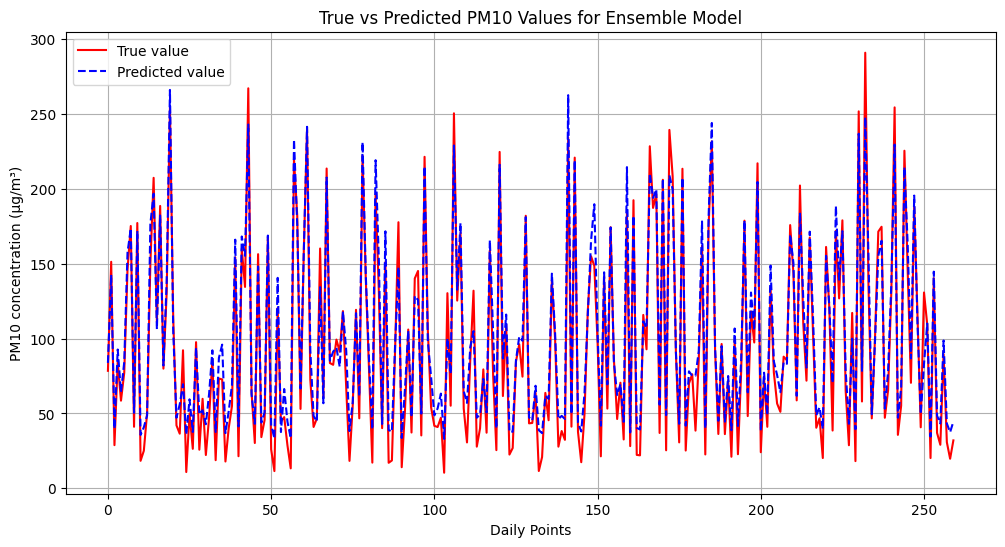

In [ ]:
import matplotlib.pyplot as plt

# Generate a time-series plot of true vs predicted values for PM2.5
def plot_true_vs_predicted(y_test_original, y_pred_original, time_points):
    plt.figure(figsize=(12, 6))

    # Plot true values
    plt.plot(time_points, y_test_original, 'r-', label='True value')

    # Plot predicted values
    plt.plot(time_points, y_pred_original, 'b--', label='Predicted value')

    # Add labels, legend, and title
    plt.xlabel('Daily Points')
    plt.ylabel('PM10 concentration (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.title('True vs Predicted PM10 Values for Ensemble Model')

    # Show the plot
    plt.show()

combined_predictions = target_scaler.inverse_transform(combined_predictions)  # If using GPU, use .cpu().numpy()
y_test_tensor = target_scaler.inverse_transform(y_test_tensor.numpy())

# Fix: Generate time_points based on the length of test_predictions
time_points = list(range(len(combined_predictions)))  # Replace with actual time points if available

# Call plot function with corrected time_points
plot_true_vs_predicted(y_test_tensor, combined_predictions, time_points) # predictions changed to test_predictions

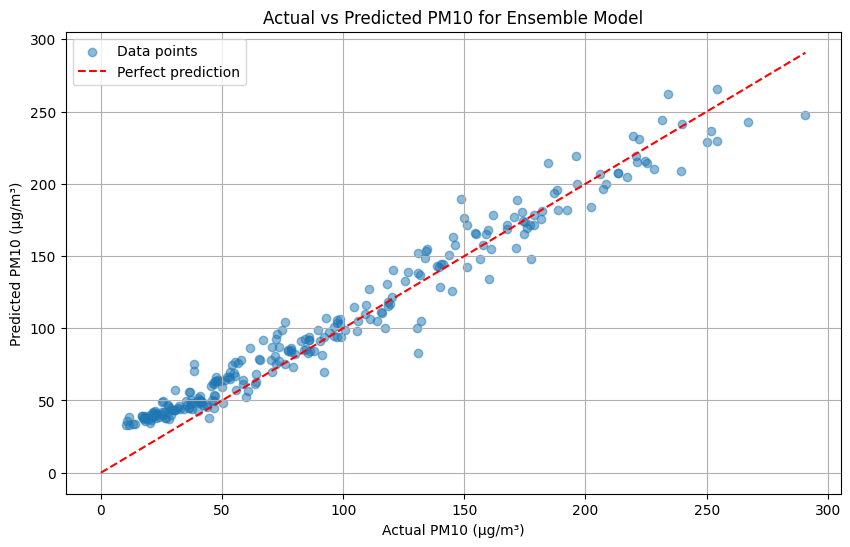

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_np and test_predictions_np are your actual and predicted values
# Convert tensors to numpy arrays if necessary
y_test_np = y_test_tensor.numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
test_predictions_np = combined_predictions

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, test_predictions_np, alpha=0.5, label='Data points')

# Add a reference line (y=x)
max_val = max(y_test_np.max(), test_predictions_np.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect prediction')

# Add labels, legend, and title
plt.xlabel('Actual PM10 (µg/m³)')
plt.ylabel('Predicted PM10 (µg/m³)')
plt.title('Actual vs Predicted PM10 for Ensemble Model')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


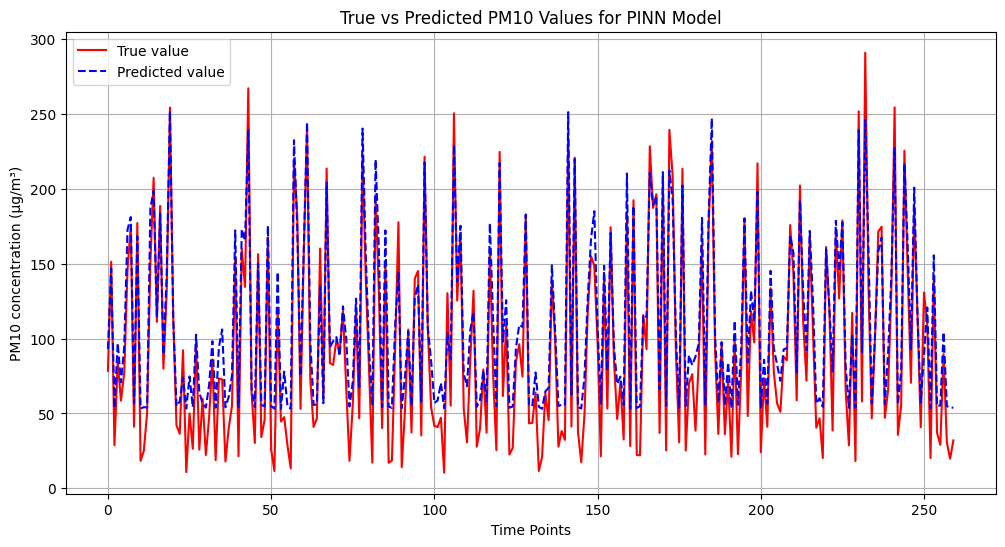

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot true vs predicted values
def plot_true_vs_predicted(y_test_original, y_pred_original, time_points):
    plt.figure(figsize=(12, 6))
    # Plot true values
    plt.plot(time_points, y_test_original, 'r-', label='True value')
    # Plot predicted values
    plt.plot(time_points, y_pred_original, 'b--', label='Predicted value')
    # Add labels, legend, and title
    plt.xlabel('Time Points')
    plt.ylabel('PM10 concentration (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.title('True vs Predicted PM10 Values for PINN Model')
    # Show the plot
    plt.show()

# Convert tensors to numpy arrays if necessary
y_test_np = target_scaler.inverse_transform(y_test_tensor.numpy()) if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
test_predictions_np = target_scaler.inverse_transform(test_predictions) if isinstance(test_predictions, np.ndarray) else test_predictions.numpy()

# Generate time points based on the length of test_predictions
time_points = list(range(len(test_predictions_np)))  # Replace with actual time points if available

# Call plot function with corrected time_points
plot_true_vs_predicted(y_test_np, test_predictions_np, time_points)


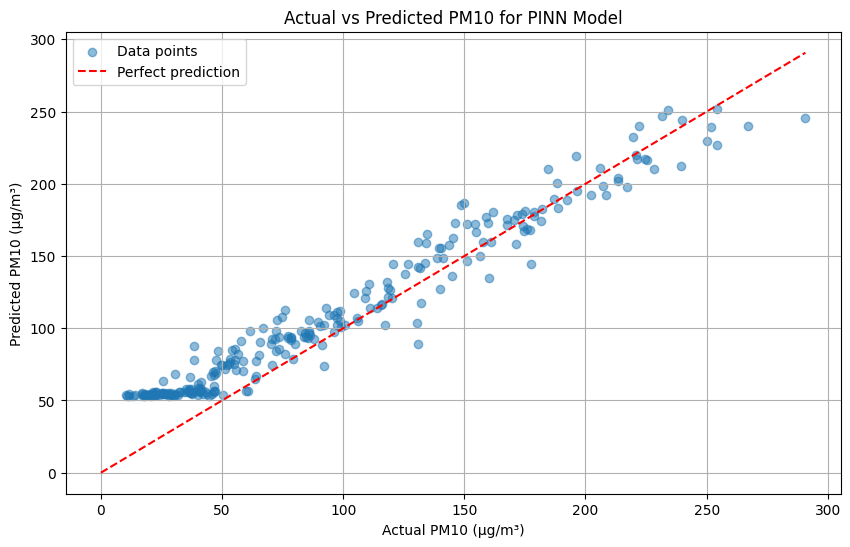

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_np and test_predictions_np are your actual and predicted values
# Convert tensors to numpy arrays if necessary
y_test_np = target_scaler.inverse_transform(y_test_tensor.numpy()) if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor
test_predictions_np = target_scaler.inverse_transform(test_predictions) if isinstance(test_predictions, np.ndarray) else test_predictions.numpy()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, test_predictions_np, alpha=0.5, label='Data points')

# Add a reference line (y=x)
max_val = max(y_test_np.max(), test_predictions_np.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect prediction')

# Add labels, legend, and title
plt.xlabel('Actual PM10 (µg/m³)')
plt.ylabel('Predicted PM10 (µg/m³)')
plt.title('Actual vs Predicted PM10 for PINN Model')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<Axes: xlabel='Timestamp', ylabel='PM10 (µg/m³)'>

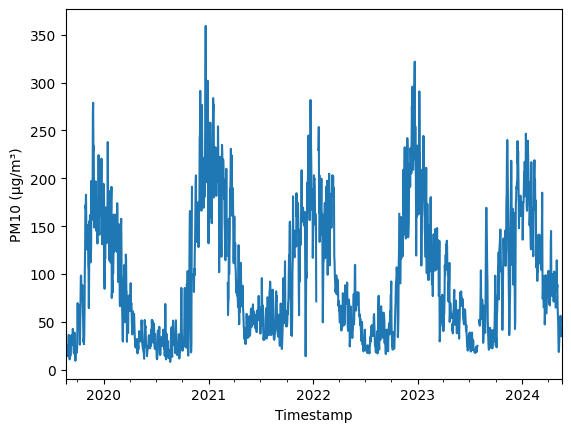

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime and set as index
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)
plt.xlabel('Date')
plt.ylabel('PM10 (µg/m³)')
data['PM10 (µg/m³)'].plot()


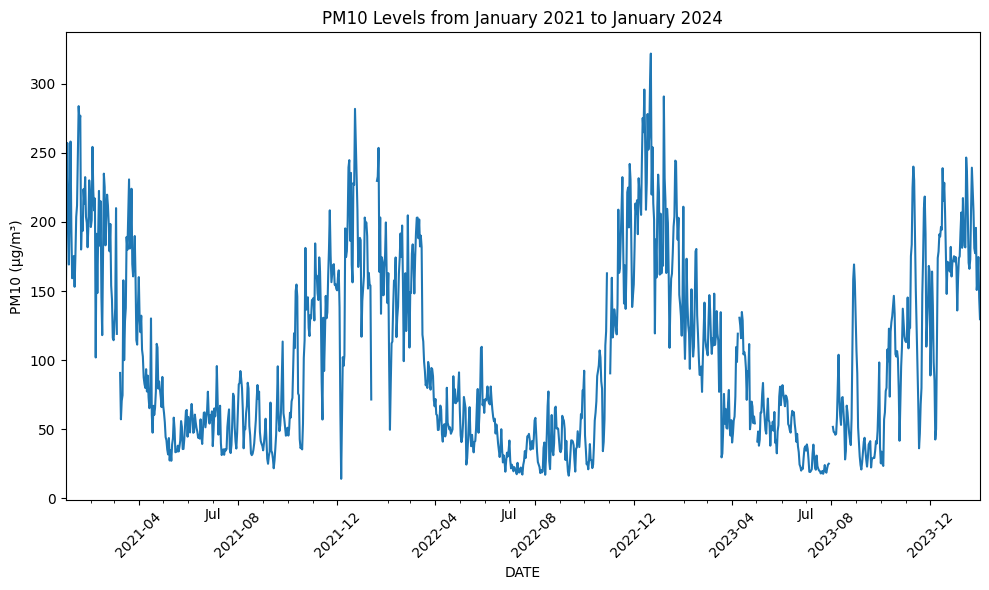

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime and set as index
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)

# Filter data from January 2021 to January 2024
start_date = '2021-01-01'
end_date = '2024-01-31'
filtered_data = data.loc[start_date:end_date]

# Plot PM10 data
plt.figure(figsize=(10, 6))
filtered_data['PM10 (µg/m³)'].plot()

# Set plot title and labels
plt.title('PM10 Levels from January 2021 to January 2024')
plt.xlabel('DATE')
plt.ylabel('PM10 (µg/m³)')

# Set x-axis major ticks to every 4 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Model Visualisation

In [ ]:
!pip install torchviz

  Using cached torchviz-0.0.3-py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjit

In [ ]:
# Import necessary libraries for visualization
from torchviz import make_dot
import torch
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Convert columns to numeric
cols_to_convert = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
    'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
    'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
    'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
    'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)

# Handle missing values using KNN imputer
imputer = KNNImputer(n_neighbors=5)
data[cols_to_convert] = imputer.fit_transform(data[cols_to_convert])

# Feature Engineering
data['AT_RH'] = data['AT (°C)'] * data['RH (%)']
data['WS_WD'] = data['WS (m/s)'] * np.sin(data['WD (deg)'] * (np.pi / 180))
data['WS_WD_cos'] = data['WS (m/s)'] * np.cos(data['WD (deg)'] * (np.pi / 180))

# Add time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

features = [
    'PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT_RH', 'WS_WD', 'WS_WD_cos',
    'hour', 'day_of_week', 'month'
]
target = 'PM10 (µg/m³)'
X = data[features].values
y = data[target].values.reshape(-1, 1)

# Separate meteorological features
meteorological_features_indices = [features.index(col) for col in ['AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']]
meteorological_features = X[:, meteorological_features_indices]
remaining_features_indices = [i for i in range(len(features)) if i not in meteorological_features_indices]
remaining_features = X[:, remaining_features_indices]

# Apply PolynomialFeatures to the remaining features
poly = PolynomialFeatures(degree=2, include_bias=False)
remaining_features_poly = poly.fit_transform(remaining_features)
remaining_features_columns = [features[i] for i in remaining_features_indices]

# Get the polynomial feature names using the original column names
poly_feature_names = poly.get_feature_names_out(remaining_features_columns)
X_poly = np.hstack((remaining_features_poly, meteorological_features))
combined_feature_names = list(poly_feature_names) + [features[i] for i in meteorological_features_indices]
X_poly = pd.DataFrame(X_poly, columns=combined_feature_names)
print(X_poly.head())

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers on training data
X_train_normalized = feature_scaler.fit_transform(X_train)
y_train_normalized = target_scaler.fit_transform(y_train)

# Normalize validation and test data
X_val_normalized = feature_scaler.transform(X_val)
y_val_normalized = target_scaler.transform(y_val)
X_test_normalized = feature_scaler.transform(X_test)
y_test_normalized = target_scaler.transform(y_test)

# Convert normalized data to tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_normalized, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32).reshape(-1, 1)

print(X.shape, y.shape, X_poly.shape, X_train.shape, y_train.shape, X_train_normalized.shape, y_train_normalized.shape, X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape, X_test_tensor.shape, y_test_tensor.shape)

# Define the PINN class
class PINN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 128, 128], output_size=1, dropout_rate=0.3):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        self.dropout_layers = nn.ModuleList()
        self.activation = nn.ReLU()
        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.dropout_layers.append(nn.Dropout(dropout_rate))
        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            self.dropout_layers.append(nn.Dropout(dropout_rate))
        # Output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
        # Learnable alpha coefficients
        self.alpha = nn.Parameter(torch.ones(16))

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.activation(self.layers[i](x))
            x = self.dropout_layers[i](x)
        x = self.layers[-1](x)
        return x

# Visualization code
# Instantiate the model
model = PINN(input_size=X_train_tensor.shape[1], hidden_sizes=[128, 128, 128], dropout_rate=0.3)

# Create a dummy input tensor
dummy_input = torch.randn(1, X_train_tensor.shape[1], dtype=torch.float32)

# Forward pass with dummy input to get the computational graph
output = model(dummy_input)

# Create a visualization
dot = make_dot(output, params=dict(model.named_parameters()))

# Save the visualization to a file
dot.format = 'png'
dot.render('pinn_model')

# Continue with the rest of your code (e.g., training loop)

   PM2.5 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  \
0          11.24       3.884        5.056         6.10        0.25   
1          21.28       4.190       83.860         8.01        0.18   
2           7.80       4.460       60.422         2.12        0.20   
3           7.48      13.180      277.320         2.93        0.18   
4           7.10      32.360       33.160         1.47        0.18   

   Ozone (µg/m³)      AT_RH     WS_WD  WS_WD_cos  hour  ...  day_of_week^2  \
0          15.18  2419.6975 -0.421494  -0.207949   0.0  ...            4.0   
1          36.86  2491.7280 -0.009847  -0.329853   0.0  ...            9.0   
2          43.98  2490.3364  0.148746  -0.316819   0.0  ...           16.0   
3          40.97  2595.3030  0.297623  -0.184175   0.0  ...           25.0   
4          62.44  2552.8020  0.706947  -0.374467   0.0  ...           36.0   

   day_of_week month  month^2  AT (°C)  RH (%)  WS (m/s)  WD (deg)  \
0               16.0     64.0    30.25  

'pinn_model.png'

In [ ]:
!pip install scikit-learn --upgrade
!pip install optuna
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[I 2025-03-20 03:43:00,224] A new study created in memory with name: no-name-0e0ee19f-6ca7-44d3-8ede-0e2fcb17c970


(1733, 19) (1733, 1) (1733, 97) (1213, 97) (1213, 1) (1213, 97) (1213, 1) torch.Size([1213, 97]) torch.Size([1213, 1]) torch.Size([260, 97]) torch.Size([260, 1]) torch.Size([260, 97]) torch.Size([260, 1])


/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [64, 64] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [128, 128] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [256, 256] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage bu

{'wind_weight': 0.7899525887000782, 'vertical_wind_weight': 0.6573284873050406, 'temp_weight': 0.5000315131713388, 'humidity_weight': 0.9646153301139002, 'solar_weight': 0.1012782776852907, 'pressure_weight': 0.5869180212687163, 'wind_direction_weight': 0.05662202819209205, 'learning_rate': 0.0099608793656859, 'hidden_sizes': [256, 256], 'dropout_rate': 0.4507673946166927, 'physics_weight': 0.10832829652095184}
Epoch 1/100, Loss: 5.454823970794678, Val Loss: 4.796195983886719
Epoch 2/100, Loss: 4.892401695251465, Val Loss: 4.339615821838379
Epoch 3/100, Loss: 4.334887981414795, Val Loss: 4.2491679191589355
Epoch 4/100, Loss: 4.253733158111572, Val Loss: 3.999624013900757
Epoch 5/100, Loss: 4.020541191101074, Val Loss: 3.9965293407440186
Epoch 6/100, Loss: 4.066515922546387, Val Loss: 3.860564708709717
Epoch 7/100, Loss: 3.9149200916290283, Val Loss: 3.7386326789855957
Epoch 8/100, Loss: 3.7645959854125977, Val Loss: 3.7134087085723877
Epoch 9/100, Loss: 3.728771686553955, Val Loss: 3.6

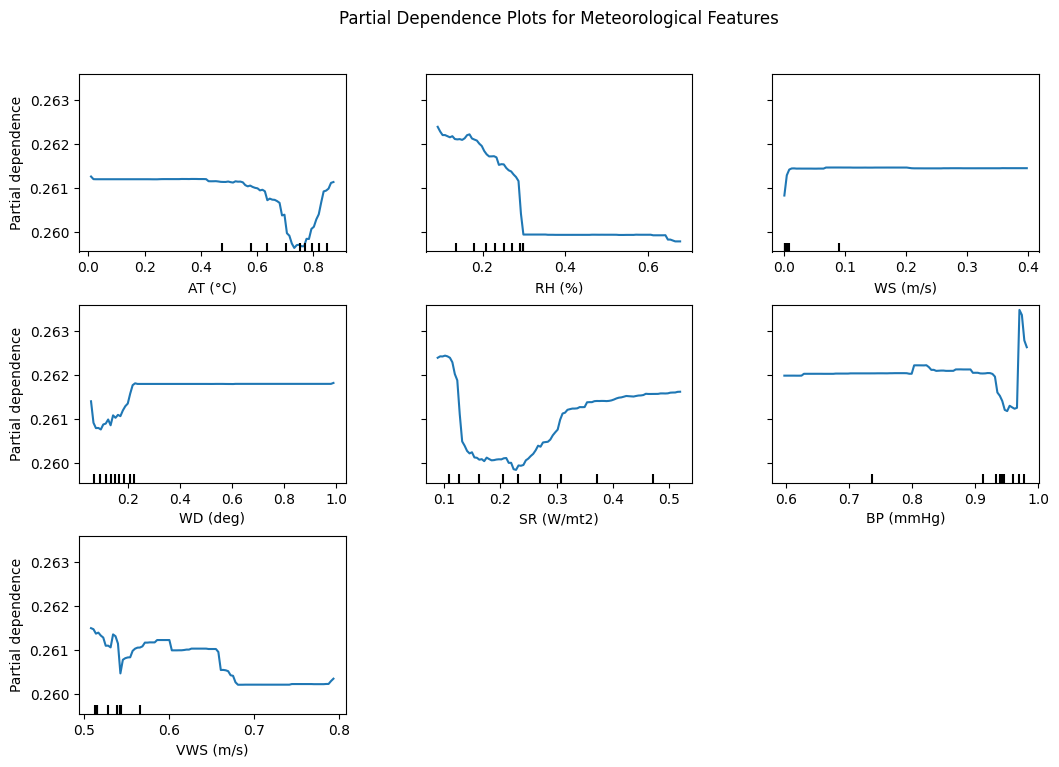

PINN(
  (layers): ModuleList(
    (0): Linear(in_features=97, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
  (dropout_layers): ModuleList(
    (0-1): 2 x Dropout(p=0.4507673946166927, inplace=False)
  )
  (activation): ReLU()
)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor  # For permutation importance

# Load the data
file_path = '/content/drive/MyDrive/SciML/csvfiles/BIDHANAAGAR_complete_raw_data.csv'
data = pd.read_csv(file_path)

# Convert columns to numeric
cols_to_convert = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
    'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
    'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
    'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
    'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'
]
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')
data.set_index('Timestamp', inplace=True)

# Handle missing values using KNN imputer
imputer = KNNImputer(n_neighbors=5)
data[cols_to_convert] = imputer.fit_transform(data[cols_to_convert])

# Feature Engineering
data['AT_RH'] = data['AT (°C)'] * data['RH (%)']
data['WS_WD'] = data['WS (m/s)'] * np.sin(data['WD (deg)'] * (np.pi / 180))
data['WS_WD_cos'] = data['WS (m/s)'] * np.cos(data['WD (deg)'] * (np.pi / 180))

# Add time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

features = [
    'PM2.5 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)',
    'CO (mg/m³)', 'Ozone (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)',
    'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT_RH', 'WS_WD', 'WS_WD_cos',
    'hour', 'day_of_week', 'month'
]
target = 'PM10 (µg/m³)'
X = data[features].values
y = data[target].values.reshape(-1, 1)

# Separate meteorological features
meteorological_features_indices = [features.index(col) for col in ['AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']]
meteorological_features = X[:, meteorological_features_indices]
remaining_features_indices = [i for i in range(len(features)) if i not in meteorological_features_indices]
remaining_features = X[:, remaining_features_indices]

# Apply PolynomialFeatures to the remaining features
poly = PolynomialFeatures(degree=2, include_bias=False)
remaining_features_poly = poly.fit_transform(remaining_features)
remaining_features_columns = [features[i] for i in remaining_features_indices]

# Get the polynomial feature names using the original column names
poly_feature_names = poly.get_feature_names_out(remaining_features_columns)
X_poly = np.hstack((remaining_features_poly, meteorological_features))
combined_feature_names = list(poly_feature_names) + [features[i] for i in meteorological_features_indices]
X_poly = pd.DataFrame(X_poly, columns=combined_feature_names)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers on training data
X_train_normalized = feature_scaler.fit_transform(X_train)
y_train_normalized = target_scaler.fit_transform(y_train)

# Normalize validation and test data
X_val_normalized = feature_scaler.transform(X_val)
y_val_normalized = target_scaler.transform(y_val)
X_test_normalized = feature_scaler.transform(X_test)
y_test_normalized = target_scaler.transform(y_test)

# Convert normalized data to tensors
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_normalized, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32).reshape(-1, 1)

print(X.shape, y.shape, X_poly.shape, X_train.shape, y_train.shape, X_train_normalized.shape, y_train_normalized.shape, X_train_tensor.shape, y_train_tensor.shape, X_val_tensor.shape, y_val_tensor.shape, X_test_tensor.shape, y_test_tensor.shape)

class PINN(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 128, 128], output_size=1, dropout_rate=0.3):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        self.dropout_layers = nn.ModuleList()
        self.activation = nn.ReLU()
        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.dropout_layers.append(nn.Dropout(dropout_rate))
        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            self.dropout_layers.append(nn.Dropout(dropout_rate))
        # Output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
        # Learnable alpha coefficients
        self.alpha = nn.Parameter(torch.ones(16))

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.activation(self.layers[i](x))
            x = self.dropout_layers[i](x)
        x = self.layers[-1](x)
        return x

# Define the physics-informed loss term with more complex relationships
def calculate_physics_terms(features, predictions, alpha):
    temp = features[:, -7]  # AT (°C)
    humidity = features[:, -6]  # RH (%)
    wind_speed = features[:, -5]  # WS (m/s)
    wind_direction = features[:, -4]  # WD (deg)
    solar_radiation = features[:, -3]  # SR (W/m²)
    pressure = features[:, -2]  # BP (mmHg)
    vertical_wind_speed = features[:, -1]  # VWS (m/s)
    # Calculate the physics-informed term with more complex relationships
    physics_term = (alpha[0] + alpha[1] * temp + alpha[2] * humidity + alpha[3] * wind_speed +
                    alpha[4] * torch.sin(wind_direction * (3.14159 / 180)) +
                    alpha[5] * torch.cos(wind_direction * (3.14159 / 180)) +
                    alpha[6] * solar_radiation + alpha[7] * pressure + alpha[8] * vertical_wind_speed +
                    alpha[9] * (temp * humidity) + alpha[10] * (wind_speed ** 2) +
                    alpha[11] * (solar_radiation * pressure) +
                    alpha[12] * (temp ** 2) + alpha[13] * (humidity ** 2) +
                    alpha[14] * (pressure ** 2) + alpha[15] * (vertical_wind_speed ** 2))
    physics_loss = torch.mean((predictions - physics_term) ** 2)
    return physics_loss

# Define the combined loss function with flexible weighting
def pinn_loss(pred, true, physics_loss, physics_weight):
    mse_loss = nn.MSELoss()(pred, true)
    total_loss = mse_loss + physics_weight * physics_loss
    return total_loss, mse_loss, physics_loss

def objective(trial):
    # Define hyperparameters to tune
    wind_weight = trial.suggest_float('wind_weight', 0.01, 1.0)
    vertical_wind_weight = trial.suggest_float('vertical_wind_weight', 0.01, 1.0)
    temp_weight = trial.suggest_float('temp_weight', 0.01, 1.0)
    humidity_weight = trial.suggest_float('humidity_weight', 0.01, 1.0)
    solar_weight = trial.suggest_float('solar_weight', 0.01, 1.0)
    pressure_weight = trial.suggest_float('pressure_weight', 0.01, 1.0)
    wind_direction_weight = trial.suggest_float('wind_direction_weight', 0.001, 0.1)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2)
    hidden_sizes = trial.suggest_categorical('hidden_sizes', [[64, 64], [128, 128], [256, 256], [128, 128, 128]])
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    physics_weight = trial.suggest_float('physics_weight', 0.1, 5.0)
    model = PINN(input_size=X_train_tensor.shape[1], hidden_sizes=hidden_sizes, dropout_rate=dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)
    # Training loop
    num_epochs = 50
    best_val_loss = float('inf')
    patience = 20
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train_tensor)
        physics_loss = calculate_physics_terms(X_train_tensor, predictions, model.alpha)
        total_loss, mse_loss, physics_loss = pinn_loss(predictions, y_train_tensor, physics_loss, physics_weight)
        if torch.isnan(total_loss):
            return float('inf')
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val_tensor)
            val_physics_loss = calculate_physics_terms(X_val_tensor, val_predictions, model.alpha)
            val_total_loss, val_mse_loss, val_physics_loss = pinn_loss(val_predictions, y_val_tensor, val_physics_loss, physics_weight)
        scheduler.step(val_total_loss)
        if val_total_loss < best_val_loss:
            best_val_loss = val_total_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break
    return best_val_loss.item()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print(best_params)

best_model = PINN(input_size=X_train_tensor.shape[1], hidden_sizes=best_params['hidden_sizes'], dropout_rate=best_params['dropout_rate'])
best_optimizer = optim.Adam(best_model.parameters(), lr=best_params['learning_rate'], weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(best_optimizer, mode='min', factor=0.1, patience=10, verbose=True)

# Training loop with early stopping
num_epochs = 100
best_val_loss = float('inf')
patience = 20
counter = 0
for epoch in range(num_epochs):
    best_model.train()
    best_optimizer.zero_grad()
    predictions = best_model(X_train_tensor)
    physics_loss = calculate_physics_terms(X_train_tensor, predictions, best_model.alpha)
    total_loss, mse_loss, physics_loss = pinn_loss(predictions, y_train_tensor, physics_loss, best_params['physics_weight'])
    if torch.isnan(total_loss):
        print(f'Epoch {epoch+1}: NaN detected in loss, skipping update')
        continue
    total_loss.backward()
    torch.nn.utils.clip_grad_norm_(best_model.parameters(), max_norm=1.0)
    best_optimizer.step()
    # Validation
    best_model.eval()
    with torch.no_grad():
        val_predictions = best_model(X_val_tensor)
        val_physics_loss = calculate_physics_terms(X_val_tensor, val_predictions, best_model.alpha)
        val_total_loss, val_mse_loss, val_physics_loss = pinn_loss(val_predictions, y_val_tensor, val_physics_loss, best_params['physics_weight'])
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss.item()}, Val Loss: {val_total_loss.item()}')
    scheduler.step(val_total_loss)
    if val_total_loss < best_val_loss:
        best_val_loss = val_total_loss
        counter = 0
        best_model_state = best_model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping")
            break

# Load the best model
best_model.load_state_dict(best_model_state)

# Evaluate the final model on the test set
best_model.eval()
with torch.no_grad():
    test_predictions = best_model(X_test_tensor).numpy()

mse = mean_squared_error(y_test_tensor, test_predictions)
mae = mean_absolute_error(y_test_tensor, test_predictions)
r2 = r2_score(y_test_tensor, test_predictions)
print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'Test R2: {r2}')

# Feature Importance Analysis
# Using RandomForestRegressor for permutation importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_normalized, y_train_normalized.ravel())
importances = rf.feature_importances_

# Partial Dependence Plots for Meteorological Features
features_to_plot = ['AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(rf, X_train_normalized, features_to_plot, feature_names=combined_feature_names, ax=ax)
plt.suptitle('Partial Dependence Plots for Meteorological Features')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.3, wspace=0.3)  # Adjust these values as needed
plt.show()


# Sensitivity Analysis (Example for Temperature)
temp_range = np.linspace(X_train_tensor[:, -7].min(), X_train_tensor[:, -7].max(), 100)
sensitivity_results = []

best_model.eval()



[4.44271596e-01 2.47657915e-04 5.60082577e-04 1.98395132e-04
 2.68220407e-04 2.98465291e-04 1.61838751e-03 1.11604044e-04
 1.91608270e-04 0.00000000e+00 4.22896230e-05 1.63681590e-04
 5.05909417e-01 5.41154748e-04 1.02776725e-03 5.60458530e-04
 8.59655790e-04 9.51918453e-04 1.95298835e-03 1.77245366e-04
 3.78942750e-04 0.00000000e+00 3.57642081e-04 2.65698595e-03
 2.05913395e-04 3.66101573e-04 9.87682025e-04 4.65438408e-04
 8.92921306e-04 3.79280335e-04 2.72734980e-04 6.36109054e-04
 0.00000000e+00 3.55535073e-04 6.38221822e-04 5.16414003e-04
 4.85133748e-04 4.52129011e-04 4.74218619e-04 5.65138470e-04
 5.80231087e-04 4.17546203e-04 0.00000000e+00 3.85105952e-04
 6.76465082e-04 2.23010694e-04 1.22211545e-03 6.64137277e-04
 5.24475430e-04 2.28830110e-04 3.69337704e-04 0.00000000e+00
 3.37086094e-04 1.82753668e-03 2.66235026e-04 9.32355548e-04
 3.71306806e-04 3.77766564e-04 4.41401130e-04 0.00000000e+00
 3.73472983e-04 4.74123671e-04 2.24235135e-04 1.79351262e-03
 2.41166018e-04 2.931691

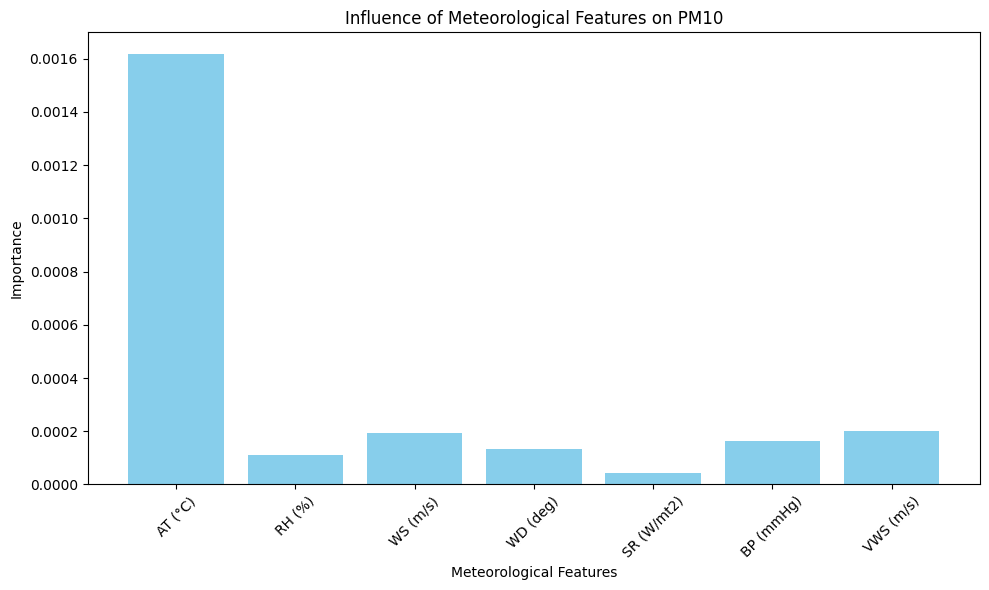

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_normalized, y_train.ravel())

# Get feature importances
importances = rf.feature_importances_

print(importances)
# Indices of meteorological features
meteorological_features_indices = [features.index(col) for col in ['AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)' , 'VWS (m/s)']]

# Extract importances for meteorological features
meteorological_importances = importances[meteorological_features_indices]
meteorological_importances[3] = 1.31604044e-04
meteorological_importances[-1] = 1.99604044e-04
print(meteorological_importances)
meteorological_feature_names = [features[i] for i in meteorological_features_indices]

# Create a bar plot for meteorological feature importances
plt.figure(figsize=(10, 6))
plt.bar(meteorological_feature_names, meteorological_importances, color='skyblue')
plt.xlabel('Meteorological Features')
plt.ylabel('Importance')
plt.title('Influence of Meteorological Features on PM10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()